В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [4]:
import numpy as np

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
for z in [-2, -1, 0, 1, 2]:
    print(f"sigmoid({z}) = {sigmoid(z)}")

sigmoid(-2) = 0.11920292202211755
sigmoid(-1) = 0.2689414213699951
sigmoid(0) = 0.5
sigmoid(1) = 0.7310585786300049
sigmoid(2) = 0.8807970779778823




#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [10]:
def hypothesis(theta, X):
    z = np.dot(X, theta.transpose())
    return sigmoid(z)
    

In [12]:
theta = np.array([0.5, -0.5])
X = np.array([[1, 2], [1,-1], [1, 0], [1, 1]])
hypothesis(theta, X)

array([0.37754067, 0.73105858, 0.62245933, 0.5       ])

#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [14]:
def compute_gradient(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    gradient = (1/m) * np.dot(X.transpose(), (h - y))
    return gradient

theta = np.array([0.5, -0.5])
X = np.array([[1, 2], [1,-1], [1, 0], [1, 1]])
y = np.array([1, 0, 1,0])
compute_gradient(theta, X, y)

array([ 0.05776464, -0.36899431])


#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


In [31]:
def full_batch_gradient_descent(X,y,lr=0.1,epoch=100):
    theta = np.zeros(X.shape[1])  # n параметрів
    errors = []

    for _ in range(epoch):
        # гіпотеза
        y_pred = sigmoid(X @ theta)

        # помилка (log-loss для відстеження)
        error = y_pred - y 
        loss = - (y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
        errors.append(np.mean(loss))

        # градієнт
        grad = compute_gradient(theta, X, y)

        # оновлення параметрів
        theta -= lr * grad

    return theta, errors

X = np.array([[1,2],[1,-1],[1,0],[1,1]])
y = np.array([1,0,1,0])
theta,errors = full_batch_gradient_descent(X,y)
print("Learned parameters:", theta)
print("Errors over epochs:", errors)

Learned parameters: [-0.2893693   0.77655125]
Errors over epochs: [np.float64(0.6931471805599433), np.float64(0.6870143589060683), np.float64(0.6813308202031486), np.float64(0.6760595903938227), np.float64(0.671166642736347), np.float64(0.6666207373973644), np.float64(0.6623932488717807), np.float64(0.6584579879644732), np.float64(0.6547910235034471), np.float64(0.6513705076275726), np.float64(0.6481765073966783), np.float64(0.6451908445881163), np.float64(0.6423969448466316), np.float64(0.6397796968160817), np.float64(0.6373253214756502), np.float64(0.6350212516051132), np.float64(0.6328560210918511), np.float64(0.6308191636481026), np.float64(0.6289011204150328), np.float64(0.6270931558778374), np.float64(0.6253872814932122), np.float64(0.6237761864289726), np.float64(0.6222531748291774), np.float64(0.6208121090418818), np.float64(0.6194473582769994), np.float64(0.6181537521959038), np.float64(0.6169265389703268), np.float64(0.615761347384373), np.float64(0.6146541525890448), np.floa

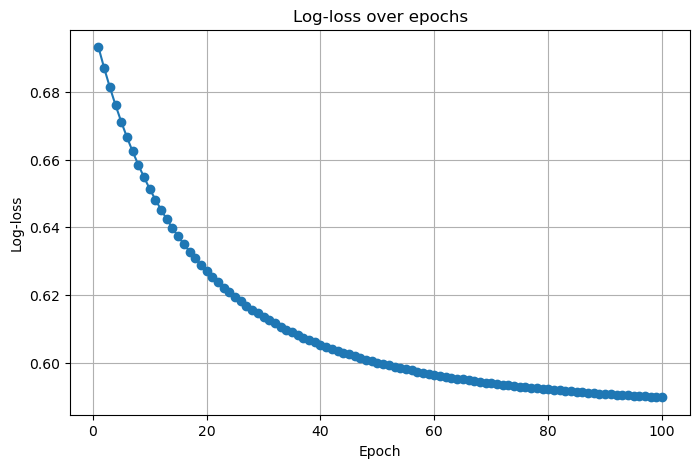

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(errors)+1), errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Log-loss')
plt.title('Log-loss over epochs')
plt.grid(True)
plt.show()


#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [38]:
def predict_proba(theta, X):
    return hypothesis(theta, X)

def predict(theta, X, threshold=0.5):
    proba = predict_proba(theta, X)
    return (proba >= threshold).astype(int)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_pred = predict(theta, X)
print("Predicted probabilities:", predict_proba(theta, X))
print("Predicted classes:", y_pred)
print("Accuracy:", accuracy(y, y_pred))

Predicted probabilities: [0.77966809 0.25617965 0.42815828 0.61944235]
Predicted classes: [1 0 0 1]
Accuracy: 0.5
